In [3]:
# @title Import Necessary Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# HW 9 - Advanced Plotting
### Due November 11, 2024 at 11:59pm
Welcome to your last problem set of the semester! (\*confetti\*) It's time for the hardest but also coolest homework of the course. Have fun!

## 1) Subplot Plotting Practice

C:\Users\kingd\AppData\Local\Temp\ipykernel_48408\2649914408.py:44: RuntimeWarning: invalid value encountered in sqrt
  return np.where((0.4**2 - (0.6 - np.sqrt(x2**2 + y2**2))**2) >= 0, np.sqrt(0.4**2 - (0.6 - np.sqrt(x2**2 + y2**2))**2), 0) #This needs a special domain


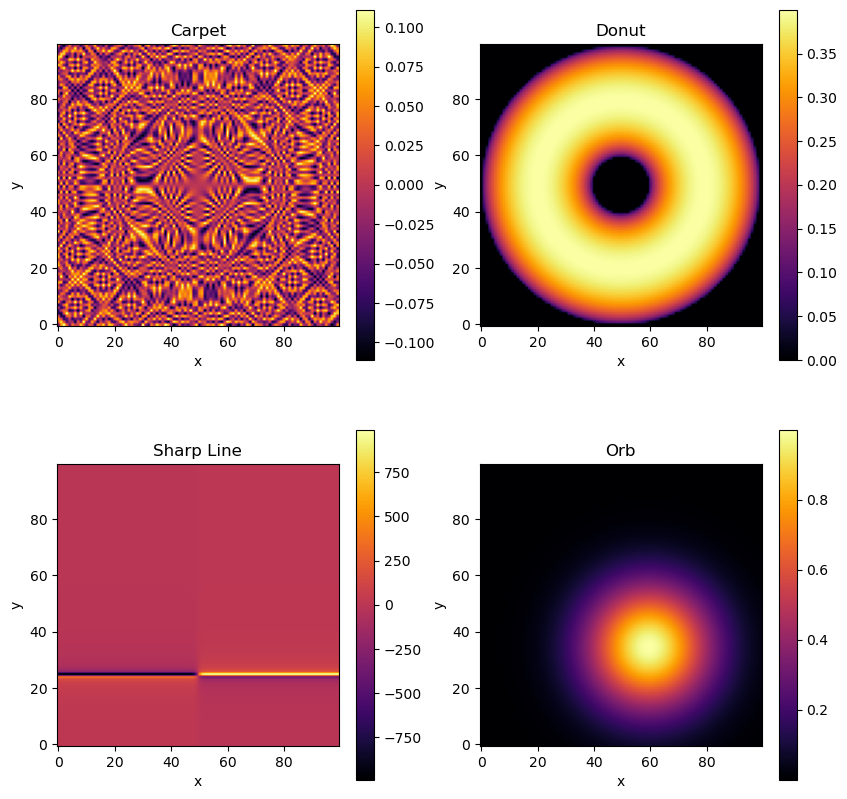

In [65]:
# @markdown Plot these functions on a 2 X 2 grid of subplots (4 plots total). Use fun colormaps!


# @markdown Plot 1 (Top Left):

# @markdown $$ f(x,y) = \frac{sin(xy) * sin(1-(9x)^2 + (9y)^2)}{9} $$
# @markdown Plot 2 (Top Right):
# @markdown $$ f(x,y) = (0.4^2 -(0.6-(x^2+y^2)^{\!1/2})^2)^{\!1/2} $$
# @markdown Plot 3 (Bottom Left):
# @markdown $$ f(x, y) = \frac{\tanh(5x)}{y + 0.1}$$
# @markdown Plot 4 (Bottom Right)"
# @markdown $$ f(x, y) = \exp(-5((x - 0.2)^2 + (y + 0.3)^2))$$

# @markdown Each subplot should have it's own title, and x and y labels for each plot. Each of these is an interesting shape or structure. Create a markdown cell below your plotting cell describing what you see in each plot.

# @markdown Challenge: Use the same colormap for the whole figure (all 4 subplots).

# @markdown *Hint: Some of the functions may require a different domain (for the x values) for the function to be defined. Make sure you take this into account.*
# Your code here
n = 100

x1 = np.linspace(-10,10,n)
y1 = np.linspace(-10,10,n)
x1,y1 = np.meshgrid(x1,y1)

x2 = np.linspace(-1,1,n)
y2 = np.linspace(-1,1,n)
x2,y2 = np.meshgrid(x2,y2)

x3 = np.linspace(-10,10,n)
y3 = np.linspace(-0.2,0.2,n)
x3,y3 = np.meshgrid(x3,y3)

x4 = np.linspace(-1,1,n)
y4 = np.linspace(-1,1,n)
x4,y4 = np.meshgrid(x4,y4)


def f1(x1,y1):
    return (np.sin(x1*y1) * np.sin(1 - (9*x1)**2 + (9*y1)**2)) / 9
z1 = f1(x1,y1)

def f2(x2,y2):
    return np.where((0.4**2 - (0.6 - np.sqrt(x2**2 + y2**2))**2) >= 0, np.sqrt(0.4**2 - (0.6 - np.sqrt(x2**2 + y2**2))**2), 0) #This needs a special domain
z2 = f2(x2,y2)

def f3(x3, y3): 
    return np.tanh(5 * x3) / (y3 + 0.1) #This also needs a special domain
z3 = f3(x3,y3)

def f4(x4, y4): 
    return np.exp(-5 * ((x4 - 0.2)**2 + (y4 + 0.3)**2))
z4 = f4(x4,y4)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,10))
plot1 = ax1.imshow(z1, cmap="inferno", origin="lower")
ax1.set_title("Carpet")
ax1.set_ylabel("y")
ax1.set_xlabel("x")
plot2 = ax2.imshow(z2, cmap="inferno", origin="lower")
ax2.set_title("Donut")
ax2.set_ylabel("y")
ax2.set_xlabel("x")
plot3 = ax3.imshow(z3, cmap="inferno", origin="lower")
ax3.set_title("Sharp Line")
ax3.set_ylabel("y")
ax3.set_xlabel("x")
plot4 = ax4.imshow(z4, cmap="inferno", origin="lower")
ax4.set_title("Orb")
ax4.set_ylabel("y")
ax4.set_xlabel("x")
plt.colorbar(plot1)
plt.colorbar(plot2)
plt.colorbar(plot3)
plt.colorbar(plot4)
plt.show()

# I tried to make the titles descriptive of the graph shapes!


## 2) Random Plotting Practice

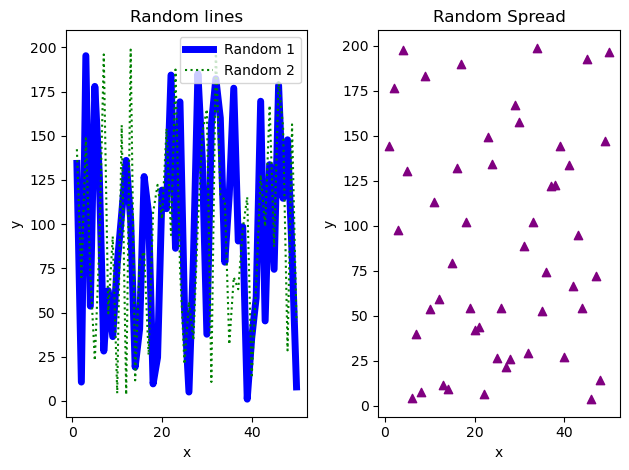

In [116]:
# This problem focuses on generating and visualizing random data in two different types of plots. First, you will create three lists of random numbers, 
# each containing 50 elements, with values ranging from 0 to 200. Then, you'll create two instead of vertical subplots:

# @markdown - The left plot should display the first list of random data as a blue line with a line width of 5, and the second list in green with a dotted line style.

# @markdown - The right plot should be a scatter plot of the third list, using purple triangles as markers. The x-coordinate should correspond to the position of each element in the list.

# @markdown Make sure to add appropriate titles and legends to each subplot.

# Your code here
random1 = np.random.uniform(0,200, size=50)
x=np.linspace(1,50,50)
random2 = np.random.uniform(0,200, size=50)
random3 = np.random.uniform(0,200, size=50)

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x, random1, color="blue", linewidth=5, label="Random 1")
ax1.plot(x, random2, color="green", linestyle="dotted", label="Random 2") #Roughly looks like the stock market right now!
ax1.set_title("Random lines")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax2.scatter(x, random3, marker="^", color="purple")
ax2.set_title("Random Spread")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.tight_layout()
plt.show()


## 3) Monte Carlo

Did you know that you can estimate the value of $\pi$ using random numbers? Crazy statement but really cool.

First, you need to generate a large number of random points inside a 1x1 square with one corner at the origin (essentially you are making a unit circle).

Second, check how many of these points fall within a distance of 1 from the origin (in other words, a radius = 1). These points will lie inside a quarter circle, centered at the origin.

By using the ratio of points inside the quarter circle to the total number of points, we can estimate $\pi$! based on the relationship between the area of a quarter circle and the square.

Your task:
- Calculate an estimate of $\pi$ using this method of $N = 10, 10^3, 10^5, 10^6$. Print these results for each value of $N$. What do you notice as $N$ gets bigger?
- For $N=10^4$, plot the points within the quarter circle in one color and the points outside in another color. Make sure the entire plots is a square. Display the estimate value of $\pi$ on the plot. Don't forget to include a title and legend.


3.2
3.14
3.13476
3.14218


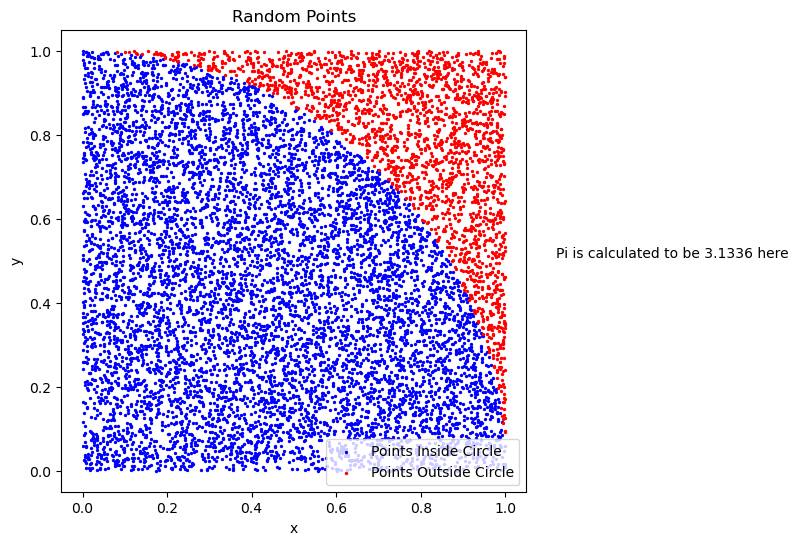

In [179]:
# Your code here
def calcPi(N):
    randx = np.random.uniform(0,1,N)
    randy = np.random.uniform(0,1,N)
    count = 0
    for i in range(len(randx)):
        if (np.sqrt( randx[i]**2 + randy[i]**2 )) <= 1:
            count = count+1
    return 4 * count / N
print(calcPi(10))
print(calcPi(10**3))
print(calcPi(10**5))
print(calcPi(10**6))

randx = np.random.uniform(0,1,10**4)
randy = np.random.uniform(0,1,10**4)
insidepointsx = []
insidepointsy = []
outsidepointsx = []
outsidepointsy = []
for i in range(len(randx)):
        if (np.sqrt( randx[i]**2 + randy[i]**2 )) <= 1:
            insidepointsx.append(randx[i])
            insidepointsy.append(randy[i])
        else:
            outsidepointsx.append(randx[i])
            outsidepointsy.append(randy[i])
pi = calcPi(10**4)
plt.figure(figsize=(6,6))
plt.scatter(insidepointsx, insidepointsy, color="blue", label="Points Inside Circle", s=2)
plt.scatter(outsidepointsx, outsidepointsy, color="red", label="Points Outside Circle", s=2)
plt.title("Random Points")
plt.xlabel("x")
plt.ylabel("y")
plt.figtext(.95, .5, f"Pi is calculated to be {pi} here")
plt.legend()
plt.show()

# Point-Spread Function

*Based on Astro 120 curriculum.*

When telescopes look at very distant sources (like stars or galaxies), the light they capture should look like a point source (focused point of light, think of a dot) on the detector.

However, due to the diffraction-limit of a telescope, atmospheric turbulence and imperfections in an optical system, the star does not appear like a point. Rather, it becomes a blurry spot on the detector which we model with a **point-spread function** (PSF).

To better visualize what the above paragraph is talking about, you will simulate the transition from a point source to a point-spread function using a 2D Gaussian function.

We can represent a point source as a single bright pixel in an image.

There is an example point-source vs. point-spread function plot in the homework 9 folder.


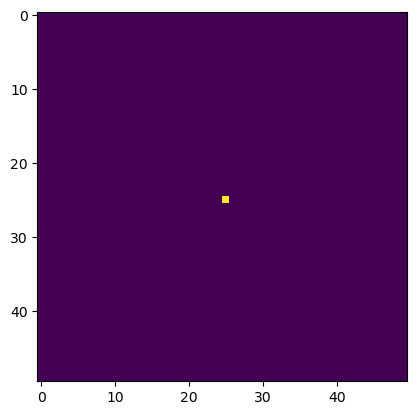

In [202]:
# @title Simulate a Point Source:
# @markdown Start by creating a 2D image (plot) of size 50×50 pixels. Represent a point source by setting the very center pixel (25,25) to have a brightness of 1.0, while all other pixels should have a value of 0.0.

# Your code here
z = np.zeros((50,50))
z[25,25] = 1
plt.figure()
plt.imshow(z)
plt.show()

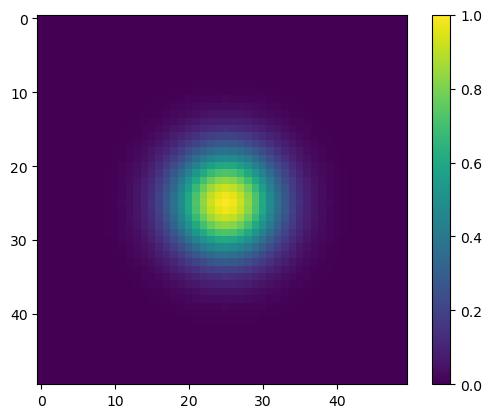

In [220]:
# @title Simulate the Point Spread:
# @markdown Now, model a PSF by plotting a 2D Gaussian function to simulate the spread of light from the point source. The Gaussian function is defined as:

# @markdown $$ \text{PSF}(x, y) = A \cdot \exp\left(-\frac{(x - x_0)^2}{2\sigma^2} - \frac{(y - y_0)^2}{2\sigma^2}\right) $$

# @markdown Where:
# @markdown - $A$ is the amplitude (brightness) of the point source.
# @markdown - $x_0$, $y_0$ are the coordinates of the center of the PSF.
# @markdown - σ controls how much the light spreads out from the center.

# @markdown Use $A = 1.0$, center the PSF at (25, 25) and use $\sigma = 3$.

# @markdown This part of the problem is very similar to problem #1 in this homework assignment.

# Your code here
A=1
x0=25
y0=25
sigma=5
x=np.arange(0,50)
y=np.arange(0,50)
x,y=np.meshgrid(x,y)
psf = A * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))
plt.figure()
plt.imshow(psf)
plt.colorbar()
plt.show()

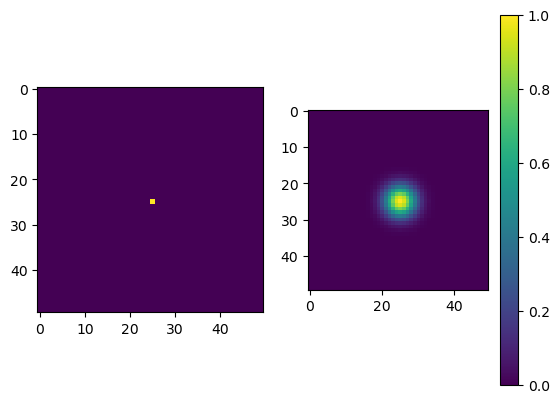

In [219]:
# @title Visualize the Transition:
# @markdown Create two plots (horizontal subplots):

# @markdown The first plot should display the original point source (a single bright pixel).
# @markdown The second plot should display the resulting point spread function (PSF), showing how the light spreads out from the point source.

# @markdown All you should be doing at this point is just taking your plots from step 1 and step 2 and turning them into subplots.

# Your code here
fig, (ax1, ax2) = plt.subplots(1,2)
plot1 = ax1.imshow(z)
plot2 = ax2.imshow(psf)
plt.colorbar(plot2)
plt.show()

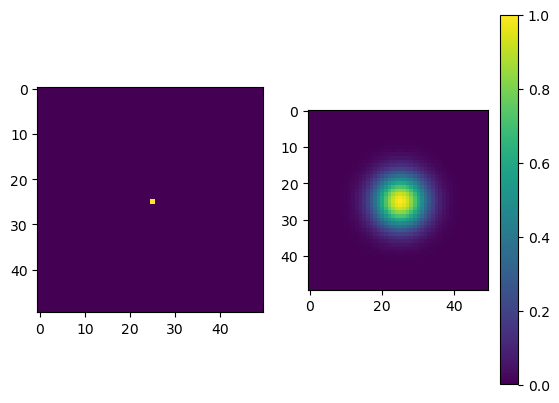

In [221]:
# @title Bonus (just for fun):
# @markdown Try changing the value of $\sigma$ How does this affect the spread of light in the PSF?
fig, (ax1, ax2) = plt.subplots(1,2)
plot1 = ax1.imshow(z)
plot2 = ax2.imshow(psf)
plt.colorbar(plot2)
plt.show()

# It makes the point spread out much wider!